**Nome:** Diego Bruning



## _Dados_
**Nome:** Desafio de regressão linear múltipla - Dados do câncer de condado

**Fonte:** [https://data.world/nrippner/ols-regression-challenge](https://data.world/nrippner/ols-regression-challenge)

**Histórico**

Esses dados foram agregados a partir de várias fontes, incluindo American Community Survey (census.gov), clinictrials.gov e cancer.gov. A maior parte do processo de preparação de dados pode ser visualizada aqui.

**Dicionário de dados**

|   |   |
| ------ | ------ |
| TARGET_deathRate | Variável dependente. Mortalidade média per capita (100.000) por câncer (a) |
| avgAnnCount | Número médio de casos notificados de câncer diagnosticados anualmente (a) |
| avgDeathsPerYear | Número médio de mortalidades relatadas devido ao câncer (a) |
| incidenceRate | Média per capita (100.000) de diagnósticos de câncer (a) |
| medianIncome | Rendimento médio por município (b) |
| popEst2015 | População do condado (b) |
| povertyPercent | Percentagem da população em situação de pobreza (b) |
| studyPerCap | Número per capita de ensaios clínicos relacionados ao câncer por condado (a) |
| binnedInc | Rendimento médio per capita encerrado por decil (b) |
| MedianAge | Idade média dos residentes do condado (b) |
| MedianAgeMale | Idade mediana dos homens residentes no condado (b) |
| MedianAgeFemale | Idade média das mulheres residentes no condado (b) |
| Geography | Nome do município (b) |
| AvgHouseholdSize | Dimensão média do agregado familiar do condado (b) |
| PercentMarried | Porcentagem de residentes do condado que são casados ​​(b) |
| PctNoHS18_24 | Porcentagem de residentes do condado com idades entre 18 e 24 anos de educação mais elevada alcançada: menos do que o ensino médio (b) |
| PctHS18_24 | Porcentagem de residentes do condado com idades entre 18 e 24 anos de escolaridade mais elevada: diploma de ensino médio (b) |
| PctSomeCol18_24 | Porcentagem de residentes do condado com idades entre 18 e 24 anos de educação mais alta alcançada: alguma faculdade (b) |
| PctBachDeg18_24 | Porcentagem de residentes do condado com idades entre 18 e 24 anos de educação mais elevada alcançada: bacharelado (b) |
| PctHS25_Over | Porcentagem de residentes do condado com 25 anos ou mais de educação mais elevada alcançada: diploma de ensino médio (b) |
| PctBachDeg25_Over | Porcentagem de residentes do condado com 25 anos ou mais de educação mais elevada alcançada: bacharelado (b) |
| PctEmployed16_Over | Porcentagem de residentes do condado com 16 anos ou mais empregados (b) |
| PctUnemployed16_Over | Porcentagem de residentes do condado com 16 anos ou mais desempregados (b) |
| PctPrivateCoverage | Porcentagem de residentes do condado com cobertura privada de saúde (b) |
| PctPrivateCoverageAlone | Porcentagem de residentes do condado apenas com cobertura privada de saúde (sem assistência pública) (b) |
| PctEmpPrivCoverage | Porcentagem de residentes do condado com cobertura privada de saúde fornecida por funcionários (b) |
| PctPublicCoverage | Porcentagem de residentes do condado com cobertura de saúde fornecida pelo governo (b) |
| PctPubliceCoverageAlone | Porcentagem de residentes do condado apenas com cobertura de saúde fornecida pelo governo (b) |
| PctWhite | Porcentagem de residentes do condado que se identificam como Brancos (b) |
| PctBlack | Porcentagem de residentes do condado que se identificam como negros (b) |
| PctAsian | Porcentagem de residentes do condado que se identificam como asiáticos (b) |
| PctOtherRace | Porcentagem de residentes do condado que se identificam em uma categoria que não é Branca, Negra ou Asiática (b) |
| PctMarriedHouseholds | Percentagem de agregados familiares casados ​​(b) |
| BirthRate | Número de nascidos vivos em relação ao número de mulheres no condado (b) |
(a) years 2010-2016 
(b) 2013 Census Estimates 


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [201]:
#Leitura dos dados
df = pd.read_csv('https://raw.githubusercontent.com/srBruning/OLSRegressionChallenge/main/cancer_reg.csv', sep=',', encoding='ISO-8859-1')
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


### Estatísticas Básicas


In [104]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

# Remoção de NaN


In [107]:
# Impressão de colunas com valores nulos
df.columns[df.isna().any()].tolist()

['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']

In [203]:
# Verificando valores nulos nos dados
n = len(df.index)
iNl = df.isnull().sum() /n

# removendo colunas com mais de 20% de dados faltantes
for idx in iNl.index[iNl>0.2]:
    print('removendo: ', idx)
    df = df.drop(idx,axis=1)


removendo:  PctSomeCol18_24


In [204]:
# removenda linhas com vlores faltando 
print('Quantidade antes de remover ', len(df.index))
df = df.dropna()
print('Quantidade após de remover ', len(df.index))

Quantidade antes de remover  3047
Quantidade após de remover  2332


Quantidade antes de remover  3047
Quantidade após de remover  591


# Remoção de outliers

In [206]:
# Para cada coluna, primeiro ele calcula a pontuação Z de cada valor na coluna, em relação à média e desvio padrão da coluna.
# Então é leva o absoluto da pontuação Z porque a direção não importa, apenas se estiver abaixo do limite.
# all (eixo = 1) garante que, para cada linha, todas as colunas satisfaçam a restrição.
# Finalmente, o resultado dessa condição é usado para indexar o quadro de dados.
from scipy import stats
# povertyPercent
# medIncome
# MedianAge
print(len(df.index))
for name in ['povertyPercent', 'medIncome', 'MedianAge']:
    df = df[(np.abs(stats.zscore(df[name])) < 3)]
    print(len(df.index))




2332
2306
2265
2244


const:  149.45274593506497
b:  1.7372235125028097
const:  222.5695482875884
b:  -0.0009298204825065189
const:  178.92750229090439
b:  -0.00021032110708367469
const:  180.65105234823574
b:  -0.002841079800709397
const:  179.09167691555766
b:  -0.0010755578663550324


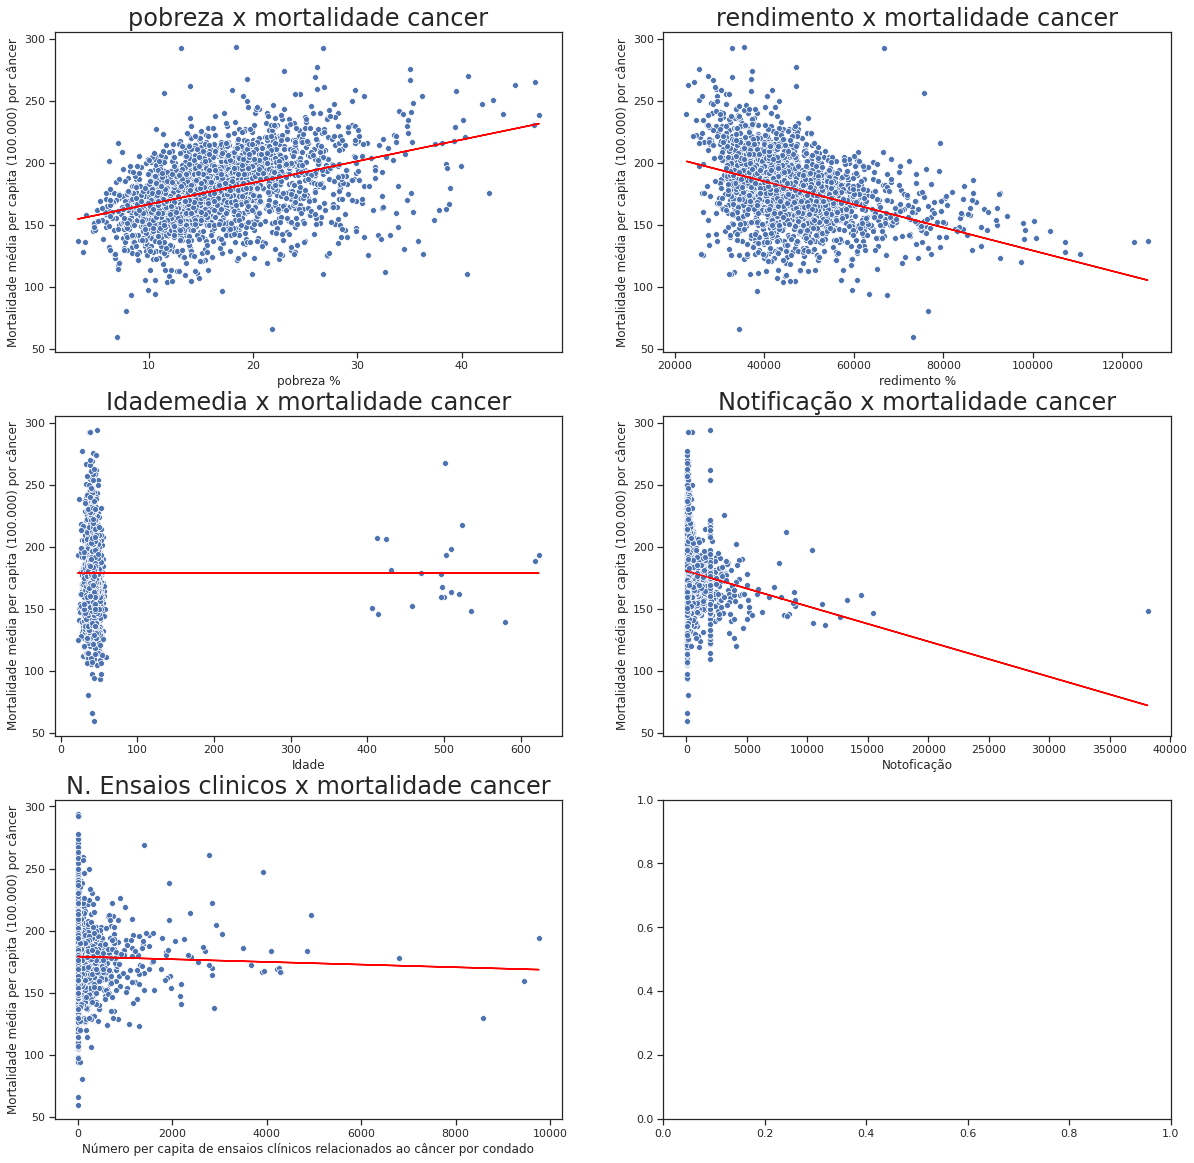

In [205]:

# sns.relplot(x='povertyPercent', y='TARGET_deathRate', sizes=(40, 400), alpha=.5, palette="muted",height=6, data=df)
# sns.relplot(x='medIncome', y='TARGET_deathRate', sizes=(40, 400), alpha=.5, palette="muted",height=6, data=df)
# # PctWhite	Porcentagem de residentes do condado que se identificam como Brancos (b)
# sns.relplot(x='PctWhite', y='TARGET_deathRate', sizes=(40, 400), alpha=.5, palette="muted",height=6, data=df)
# # PctBlack	Porcentagem de residentes do condado que se identificam como negros (b)
# sns.relplot(x='PctBlack', y='TARGET_deathRate', sizes=(40, 400), alpha=.5, palette="muted",height=6, data=df)
# # PctAsian	Porcentagem de residentes do condado que se identificam como asiáticos (b)
# sns.relplot(x='PctAsian', y='TARGET_deathRate', sizes=(40, 400), alpha=.5, palette="muted",height=6, data=df)
# # PctOtherRace	Porcentagem de residentes do condado que se identificam em uma categoria que não é Branca, Negra ou Asiática (b)
# sns.relplot(x='PctOtherRace', y='TARGET_deathRate', sizes=(40, 400), alpha=.5, palette="muted",height=6, data=df)

# Set figure size (width, height) in inches
fig, ax = plt.subplots(3,2, figsize = ( 20 , 20))

def showOLS(df, namex,namey, ax):
    # Criando a variavel x da regressão
    x1 = df[namex]
    y = df[namey]
    x = sm.add_constant(x1)
    # Ajuste 
    results = sm.OLS(y,x).fit()
    const =  results.params[0]
    b =  results.params[1]
    print('const: ', const)
    print('b: ', b) 

    y1 = const + b*x1

    ax.plot(x1, y1, c='red')
    
def showScatterplot(t,df,ax,lx,x,y='TARGET_deathRate', ly='Mortalidade média per capita (100.000) por câncer'):
    # Plot the scatterplot
    sns.scatterplot( ax = ax , x = x , y = y , data = df )
    # Set label for x-axis
    ax.set_xlabel( lx , size = 12 )
    # Set label for y-axis
    ax.set_ylabel( ly, size = 12 )
    # Set title for plot
    ax.set_title( t, size = 24 )
    showOLS(df, x,y,ax)
    


# povertyPercent	Percentagem da população em situação de pobreza (b)
showScatterplot(x='povertyPercent',ax = ax[0,0], lx='pobreza %', t="pobreza x mortalidade cancer", df=df)
# medianIncome	Rendimento médio por município (b)
showScatterplot(x='medIncome',ax = ax[0,1], lx='redimento %', t="rendimento x mortalidade cancer", df=df)
# MedianAge	Idade média dos residentes do condado (b)
showScatterplot(x='MedianAge',ax = ax[1,0], lx='Idade', t="Idademedia x mortalidade cancer", df=df) 

# avgAnnCount	Número médio de casos notificados de câncer diagnosticados anualmente (a)
showScatterplot(x='avgAnnCount',ax = ax[1,1], lx='Notoficação', t="Notificação x mortalidade cancer", df=df) 

# studyPerCap	Número per capita de ensaios clínicos relacionados ao câncer por condado (a)
showScatterplot(x='studyPerCap',ax = ax[2,0], lx='Número per capita de ensaios clínicos relacionados ao câncer por condado', t="N. Ensaios clinicos x mortalidade cancer", df=df) 


# Display figure
plt.show()